# Pandasで欠損値を扱う方法について学ぶ

In [1]:
%matplotlib inline
import pandas as pd

# 売上データのcsvファイルの読込み
df_log = pd.read_csv('dataset/product_log.csv')
df_log.head()

,Date,Num,Product
0,2017-01-03,1.0,B
1,2017-01-06,2.0,B
2,2017-01-07,1.0,A
3,2017-01-11,2.0,A
4,2017-01-12,2.0,B


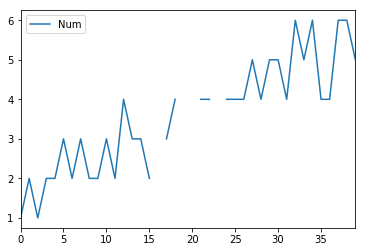

In [2]:
# ところどころデータが抜けている
df_log.plot();

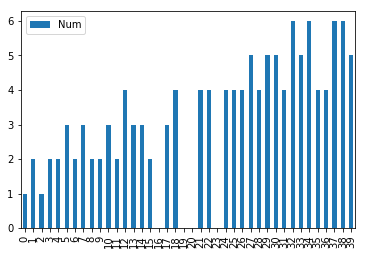

In [4]:
df_log.plot.bar();

- 欠損値の数え方

In [7]:
# 欠損値かどうか
df_log_isnull = df_log.isnull()
df_log_isnull[15:21]

,Date,Num,Product
15,False,False,False
16,False,True,False
17,False,False,False
18,False,False,False
19,False,True,False
20,False,True,False


In [8]:
# 列ごとに欠損値かどうか
df_log_col = df_log.isnull().any(0)
df_log_col

Date       False
Num         True
Product    False
dtype: bool

In [9]:
#行ごとに欠損値かどうか
df_log_row = df_log.isnull().any(1)
df_log_row

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19     True
20     True
21    False
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

In [10]:
# 欠損値が含まれる行のみ抽出
df_log[df_log.isnull().any(1)]

,Date,Num,Product
16,2017-02-08,NaN,A
19,2017-02-16,NaN,A
20,2017-02-18,NaN,A
23,2017-02-24,NaN,A


In [11]:
# 欠損値をカウントします
df_null_count = df_log.isnull().sum()
df_null_count

Date       0
Num        4
Product    0
dtype: int64

In [12]:
# 欠損値でない値をカウントする方法
df_log_count = df_log.count()
df_log_count

Date       40
Num        36
Product    40
dtype: int64

In [13]:
# 全体のサイズ-欠損値ではない値の数　＝　欠損値の数
len(df_log) - df_log.count()

Date       0
Num        4
Product    0
dtype: int64

- 欠損値を含む計算

In [15]:
# 単純な計算はnanになる
sum(df_log.Num)

nan

In [16]:
# 欠損値を含んだデータから欠損値を除くと
df_log.Num.sum()

129.0

In [17]:
# 欠損値を含む場合の平均（欠損値は無視されます）
df_log_mean = df_log.Num.mean()
df_log_mean

3.5833333333333335

In [18]:
# 平均の計算の分母の数は、全データ数ではありません
print('全データ数', len(df_log.Num))
df_log.Num.sum() / len(df_log.Num)

全データ数 40


3.225

In [19]:
# 平均の計算の分母の数は、欠損値を除くデータ数になります
print('欠損値を除くデータ数', df_log.Num.count())
df_log_mean2 = df_log.Num.sum() / df_log.Num.count()
df_log_mean2

欠損値を除くデータ数 36


3.5833333333333335

- 欠損地を含むデータの削除

In [21]:
# 欠損値ではない数
df_log.count()

Date       40
Num        36
Product    40
dtype: int64

In [22]:
#dropnaで、一つでも欠損値のレコードを削除
df_log_dropna = df_log.dropna()
df_log_dropna.count()

Date       36
Num        36
Product    36
dtype: int64

In [25]:
# dropna(subset=['Date', 'Product']) で Date列とProduct列のみ欠損値を1つでも含む行を削除
df_log_dropna3 = df_log.dropna(subset=['Date', 'Product'])
df_log_dropna3.count()

Date       40
Num        36
Product    40
dtype: int64

In [26]:
# これまでの処理でdf_log自体は変更されていない
df_log.count()

Date       40
Num        36
Product    40
dtype: int64

In [27]:
# inplace=True で df_log そのものが変更されます
df_log.dropna(inplace=True)

In [29]:
df_log.count()

Date       36
Num        36
Product    36
dtype: int64

- 欠損値を含むデータの変換

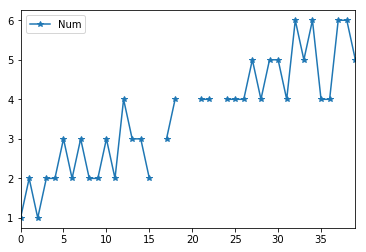

In [31]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# 売上データのcsvファイルの読込み
df_log = pd.read_csv('dataset/product_log.csv')
# グラフで確認（変更前のグラフは青色の線で描画）
df_log.plot(marker='*');

In [32]:
# fillna(0)で欠損値を0に置き換える
df_log['Num_fill_0'] = df_log.Num.fillna(0)
df_log[16:24]

,Date,Num,Product,Num_fill_0
16,2017-02-08,NaN,A,0.0
17,2017-02-12,3.0,B,3.0
18,2017-02-14,4.0,A,4.0
19,2017-02-16,NaN,A,0.0
20,2017-02-18,NaN,A,0.0
21,2017-02-20,4.0,B,4.0
22,2017-02-23,4.0,A,4.0
23,2017-02-24,NaN,A,0.0


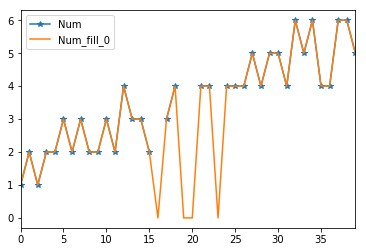

In [33]:
# 抜けていた部分が0になる
df_log.Num.plot(marker='*')  # 青色の線は上書きされて見えません
df_log.Num_fill_0.plot()  # オレンジの線
plt.legend();

In [34]:
# fillnaはdropnaと同じく元のDataFrameは変更しません
df_log.fillna(0)
print('欠損値の数 =', len(df_log) - df_log.Num.count())  # 欠損値が4つ残っています

# inplace=True をつけると元のDataFrameは変更します
df_log_copy = df_log.copy()  # 別のDataFrameに複製
df_log_copy.fillna(0, inplace=True)
print('欠損値の数 =', len(df_log) - df_log_copy.Num.count())  # 欠損値はありません

欠損値の数 = 4
欠損値の数 = 0


In [35]:
#欠損値を平均値で置き換える
df_log['Num_fill_mean'] = df_log.Num.fillna(df_log.Num.mean())
df_log[16:24]

,Date,Num,Product,Num_fill_0,Num_fill_mean
16,2017-02-08,NaN,A,0.0,3.583333
17,2017-02-12,3.0,B,3.0,3.000000
18,2017-02-14,4.0,A,4.0,4.000000
19,2017-02-16,NaN,A,0.0,3.583333
20,2017-02-18,NaN,A,0.0,3.583333
21,2017-02-20,4.0,B,4.0,4.000000
22,2017-02-23,4.0,A,4.0,4.000000
23,2017-02-24,NaN,A,0.0,3.583333


- 欠損値の補間

In [36]:
# interpolateを使うと前後の値で線形（１次式）補間できます
df_log['Num_interpolate'] = df_log.Num.interpolate()
df_log[15:22]

,Date,Num,Product,Num_fill_0,Num_fill_mean,Num_interpolate
15,2017-02-05,2.0,A,2.0,2.000000,2.0
16,2017-02-08,NaN,A,0.0,3.583333,2.5
17,2017-02-12,3.0,B,3.0,3.000000,3.0
18,2017-02-14,4.0,A,4.0,4.000000,4.0
19,2017-02-16,NaN,A,0.0,3.583333,4.0
20,2017-02-18,NaN,A,0.0,3.583333,4.0
21,2017-02-20,4.0,B,4.0,4.000000,4.0


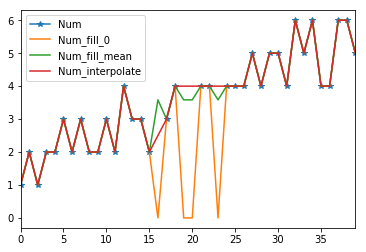

In [37]:
# 抜けていた部分が１次式で補間されます
df_log.Num.plot(marker='*')  # 青色の線は上書きされて見えません
df_log.Num_fill_0.plot()
df_log.Num_fill_mean.plot()
df_log.Num_interpolate.plot()
plt.legend();

In [38]:
# method='quadratic'で2次の補間ができます
df_log['Num_interpolate2'] = df_log.Num.interpolate(method='quadratic')
df_log[15:22]

,Date,Num,Product,Num_fill_0,Num_fill_mean,Num_interpolate,Num_interpolate2
15,2017-02-05,2.0,A,2.0,2.000000,2.0,2.000000
16,2017-02-08,NaN,A,0.0,3.583333,2.5,2.074065
17,2017-02-12,3.0,B,3.0,3.000000,3.0,3.000000
18,2017-02-14,4.0,A,4.0,4.000000,4.0,4.000000
19,2017-02-16,NaN,A,0.0,3.583333,4.0,4.386099
20,2017-02-18,NaN,A,0.0,3.583333,4.0,4.157791
21,2017-02-20,4.0,B,4.0,4.000000,4.0,4.000000


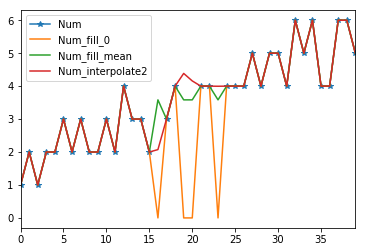

In [39]:
# 抜けていた部分が2次式で補間されます
df_log.Num.plot(marker='*')  # 青色の線は上書きされて見えません
df_log.Num_fill_0.plot()
df_log.Num_fill_mean.plot()
df_log.Num_interpolate2.plot()
plt.legend();